<a href="https://colab.research.google.com/github/NaveenShetter1/Machine-Leaning-Notebooks/blob/main/hyperparametertuing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Decision Tree classifier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/bank.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.columns.value_counts()

,count
age,1
day,1
poutcome,1
previous,1
pdays,1
campaign,1
duration,1
month,1
contact,1
job,1


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
num_of_row=df.shape[0]

In [ ]:
print(num_of_row)

11162


In [ ]:
num_of_col=df.shape[1]

In [ ]:
print(num_of_col)

17


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# here doposite is the target col

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
y=df[['deposit']]

In [ ]:
type(y)

pandas.core.frame.DataFrame

In [ ]:
y.head()

,deposit
0,yes
1,yes
2,yes
3,yes
4,yes


In [ ]:
df['deposit']=df['deposit'].map({'yes':1,'no':0})

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [ ]:
def preprocessing(df):
  new_df=df.copy()
  for i in list(df.select_dtypes(include=['object']).columns):
    new_df[i]=new_df[i].astype('category')
    # new_df[i]=new_df[i].cat.codes
    new_df=pd.get_dummies(new_df,columns=[i],drop_first=True)
  return new_df

In [ ]:
df_new=preprocessing(df)

In [ ]:
df_new.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
1,56,45,5,1467,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
2,41,1270,5,1389,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
3,55,2476,5,579,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
4,54,184,5,673,2,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
def preprocessing(df):
  new_df=df.copy()
  for i in list(df.select_dtypes(include=['bool']).columns):
    new_df[i]=new_df[i].map({True:1,False:0})
  return new_df

In [ ]:
df_new=preprocessing(df_new)

In [ ]:
df_new.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
x=df_new.drop(['deposit'],axis=1)

In [ ]:
y=df_new['deposit']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param={

       'max_depth':[1,2,3,4,5,6,7,8],
       'criterion':['gini','entropy'],
       'max_leaf_nodes':[1,2,3,4,5,6,7,8]
}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier(random_state=17)

In [ ]:
cv_dtc=GridSearchCV(dtc,cv=15,param_grid=param)

cv_dtc.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
240 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8]})

In [ ]:
print(cv_dtc.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 8}


In [ ]:
print(cv_dtc.best_score_)

0.8016526610644259


In [ ]:
new_dtc=DecisionTreeClassifier(criterion='gini',max_depth=8,max_leaf_nodes=14)

In [ ]:
new_dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=14)

In [ ]:
y_pred=new_dtc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, classification_report

In [ ]:
accuracy_score(y_test,y_pred)

0.7913121361397224

In [ ]:
confusion_matrix(y_test,y_pred)

array([[871, 295],
       [171, 896]])

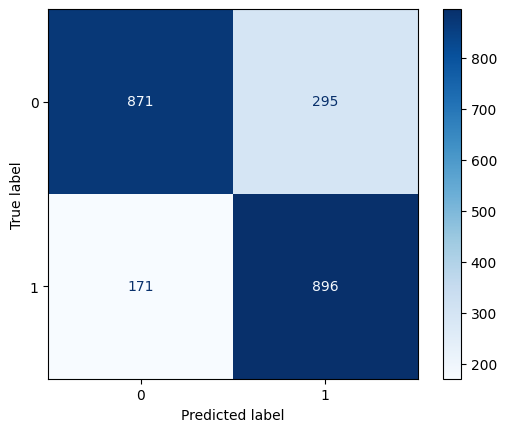

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot(cmap='Blues')